http://nbviewer.jupyter.org/github/koldunovn/earthpy.org/blob/master/content/earthpy_pandas_basics.ipynb

In [33]:


import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
# pd.set_printoptions(max_rows=15) # this limit maximum numbers of rows


AttributeError: module 'pandas' has no attribute 'version'

In [34]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2017-03-30 16:55:05--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20150 (20K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii’

monthly.ao.index.b5 100%[===================>]  19.68K  --.-KB/s    in 0.009s  

2017-03-30 16:55:05 (2.23 MB/s) - ‘monthly.ao.index.b50.current.ascii’ saved [20150/20150]



parse into dataframe

In [58]:
df = pd.read_csv("monthly.ao.index.b50.current.ascii",
                header=None,
                names=["Y", "M", "Precip"],
                sep="\s+",
                parse_dates=[[0,1]])

In [59]:
df

,Y_M,Precip
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577
5,1950-06-01,0.538570
6,1950-07-01,-0.802480
7,1950-08-01,-0.851010
8,1950-09-01,0.357970
9,1950-10-01,-0.378900


dataframe tidy up

In [82]:
df.index = df.Y_M
del df['Y_M']

In [83]:
df

,Precip
Y_M,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


resample annually, averaging.

In [92]:
 
df.resample('A').mean()

,Precip
Y_M,
1950-12-31,-0.199501
1951-12-31,-0.364626
1952-12-31,-0.674990
1953-12-31,-0.016515
1954-12-31,-0.000770
1955-12-31,-0.361816
1956-12-31,-0.162823
1957-12-31,-0.342180
1958-12-31,-0.867629


plotting

In [101]:
import matplotlib.pyplot as plt

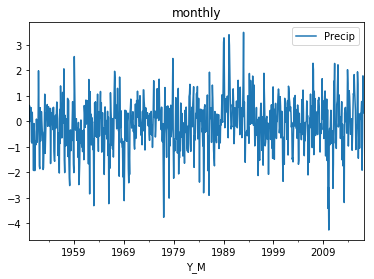

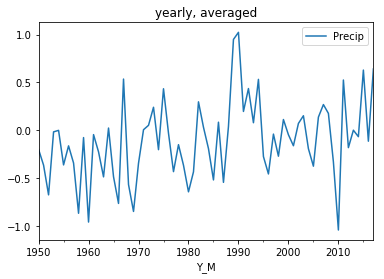

In [106]:
df.plot(title="monthly")
df.resample('A').mean().plot(title="yearly, averaged")
plt.show()